Npx=64;   N_true: 1000000.0 ;  V/V_true: 2.098 ; Void fraction: 0.523
Npx=256;  N_true: 5000000.0 ;  V/V_true: 2.128 ; Void fraction: 0.53
Npx=1024; N_true: 14000000.0 ; V/V_true: 2.134 ; Void fraction: 0.532
zeta: 1.5761


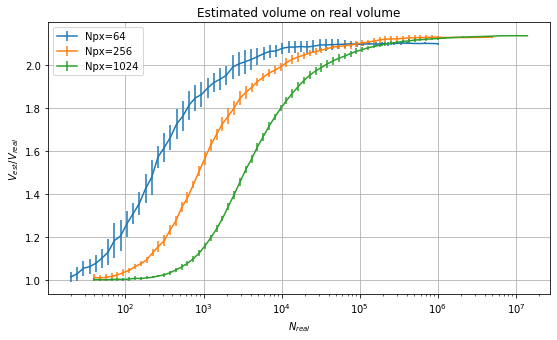

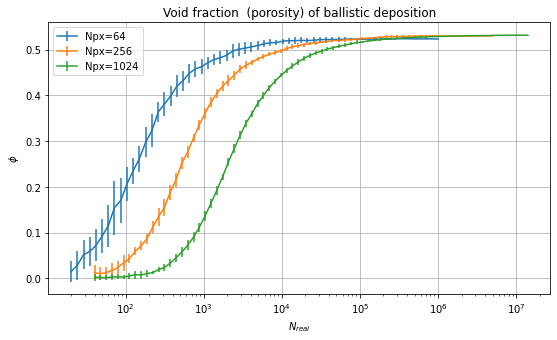

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

N_64, Ntrue_64, err_64= np.loadtxt('scaling_1d_64/V_relvsN.dat')
N_256, Ntrue_256, err_256= np.loadtxt('scaling_1d_256/V_relvsN.dat')
N_1024, Ntrue_1024, err_1024= np.loadtxt('scaling_1d_1024/V_relvsN.dat')

print('Npx=64;   N_true:', Ntrue_64[-1], ';  V/V_true:', round(N_64[-1], 3), '; Void fraction:', round(1-N_64[-1]**-1, 3))
print('Npx=256;  N_true:', Ntrue_256[-1], ';  V/V_true:', round(N_256[-1], 3), '; Void fraction:', round(1-N_256[-1]**-1, 3))
print('Npx=1024; N_true:', Ntrue_1024[-1], '; V/V_true:', round(N_1024[-1], 3), '; Void fraction:', round(1-N_1024[-1]**-1, 3))
plt.figure(figsize=(9,5))
plt.errorbar(Ntrue_64, N_64, yerr=err_64, label='Npx=64')
plt.errorbar(Ntrue_256, N_256, yerr=err_256, label='Npx=256')
plt.errorbar(Ntrue_1024, N_1024, yerr=err_1024, label='Npx=1024')
plt.xscale('log')
#plt.yscale(yscale)
plt.xlabel(r'$N_{real}$')
plt.ylabel(r'$V_{est} / V_{real}$')
plt.legend()
plt.grid()
plt.title('Estimated volume on real volume')

plt.figure(figsize=(9,5))
plt.errorbar(Ntrue_64, 1-N_64**-1, yerr=err_64/N_64**2, label='Npx=64')
plt.errorbar(Ntrue_256, 1-N_256**-1, yerr=err_256/N_256**2, label='Npx=256')
plt.errorbar(Ntrue_1024, 1-N_1024**-1, yerr=err_1024/N_1024**2, label='Npx=1024')
plt.xscale('log')
#plt.yscale(yscale)
plt.xlabel(r'$N_{real}$')
plt.ylabel(r'$ \phi $')
plt.legend()
plt.title('Void fraction  (porosity) of ballistic deposition')
plt.grid()
print('zeta: 1.5761')

[20 30 40 50 60]


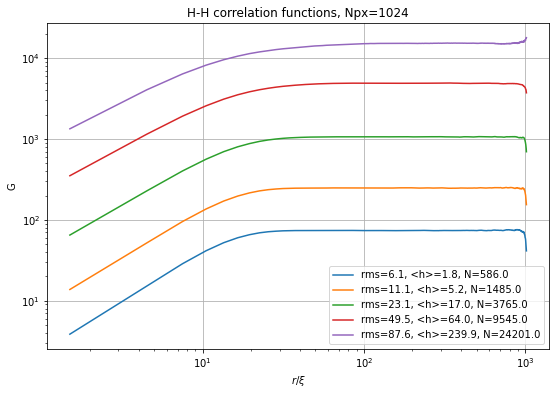

In [4]:
Nlin=np.arange(20,61, 10)
filename='scaling_mpi1kk/G.dat'
print(Nlin)

ind=filename.find('/')
h_inst, Ntrue=np.loadtxt(filename[:ind+1]+'hvsN.dat', max_rows=2)
rms = np.loadtxt(filename[:ind+1]+'rmsvsN.dat', max_rows=1)
x=np.loadtxt(filename[:ind+1]+'x.dat')

out=open(filename)
prec=1
y=np.array([])
for el in Nlin:
    for i in range(el-prec): out.readline()
    line=out.readline()
    y=np.append(y, np.fromstring(line, sep=' '))
    prec=el+1
out.close()

y=y.reshape(len(Nlin),len(x))
plt.figure(figsize=(9,6))
for i in range(len(y)): plt.plot(x,y[i], label='rms='+str(round(rms[Nlin[i]-1], 1))+', <h>='+str(round(h_inst[Nlin[i]-1], 1))+', N='+str(Ntrue[Nlin[i]-1]))
plt.grid()
#plt.xlim(0.1,30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$ r/\xi $')
plt.ylabel('G')
plt.title('H-H correlation functions, Npx=1024')
plt.legend()
plt.show()

#    if filename[ind+1]=='C': y/=rms[Nline-1]**2
#    if filename[ind+1]=='G':
#        x/=L
#        y/=2*rms[Nline-1]**2
    
    
#    out=open(filename[:ind+2]+'2.dat')
#    for i in range(Nline-1): out.readline()
#    line=out.readline()
#    err=np.sqrt(np.fromstring(line, sep=' '))
#    out.close()

[15 25 35 45 55]


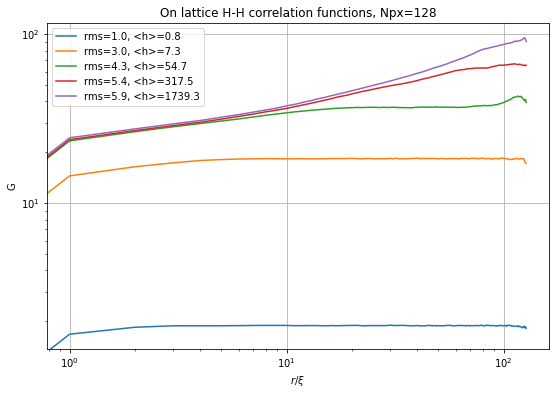

In [7]:
Nlin=np.arange(15,56, 10)
filename='scaling_2d_128/G.dat'
print(Nlin)

ind=filename.find('/')
h_inst, Ntrue=np.loadtxt(filename[:ind+1]+'hvsN.dat', max_rows=2)
rms = np.loadtxt(filename[:ind+1]+'rmsvsN.dat', max_rows=1)
#x=np.loadtxt(filename[:ind+1]+'x.dat')
x=np.arange(128)

out=open(filename)
prec=1
y=np.array([])
for el in Nlin:
    for i in range(el-prec): out.readline()
    line=out.readline()
    y=np.append(y, np.fromstring(line, sep=' '))
    prec=el+1
out.close()

y=y.reshape(len(Nlin),len(x))
plt.figure(figsize=(9,6))
for i in range(len(y)): plt.plot(x,y[i], label='rms='+str(round(rms[Nlin[i]-1], 1))+', <h>='+str(round(h_inst[Nlin[i]-1], 1)))
plt.grid()
#plt.xlim(0.1,30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$ r/\xi $')
plt.ylabel('G')
plt.title('On lattice H-H correlation functions, Npx=128')
plt.legend()
plt.show()

          slope (beta): 0.1526
slope (poisson regime): 0.5575
          slope (alfa): 0.1896
zeta: 1.2426


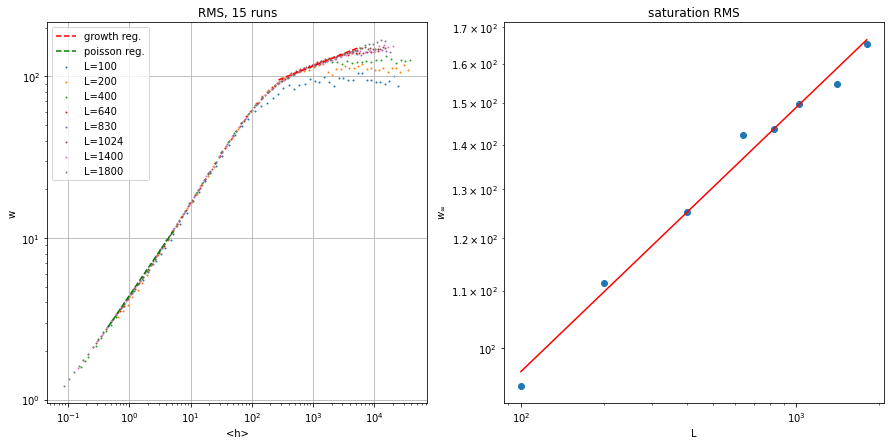

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rmsmax=np.array([])
L=np.array([100,200,400,640,830,1024,1400,1800])
testname=['scaling_mpi100/','scaling_mpi200/','scaling_mpi400/','scaling_mpi640/','scaling_mpi830/','scaling_mpi1kk/','scaling_mpi1400/','scaling_mpiwlast/']
#L=np.array([830,1800])
#testname=['scaling_mpi830/','scaling_mpiwlast/']

plt.figure(figsize=(15,7))
plt.subplot(121)
for i in range(len(testname)):
    rms, n, errrms=np.loadtxt(testname[i]+'rmsvsN.dat')
    h, n, errh=np.loadtxt(testname[i]+'hvsN.dat')
#    plt.errorbar(h,rms,xerr=errh,yerr=errrms, label='L='+str(L[i]))
    plt.scatter(h,rms, label='L='+str(L[i]), s=1)
    rmsmax=np.append(rmsmax, np.mean(rms[-3:]))
    
    if i==5:
        a,b=60,90
        res= stats.linregress(np.log10(h[a:b]), np.log10(rms[a:b]))
        plt.plot(h[a:b], 10**res.intercept * h[a:b]**res.slope, 'r', label='growth reg.', ls='dashed')
        beta=res.slope
        print('          slope (beta):', round(res.slope,4))
        
        a,b=5,30
        res= stats.linregress(np.log10(h[a:b]), np.log10(rms[a:b]))
        plt.plot(h[a:b], 10**res.intercept * h[a:b]**res.slope, 'g', label='poisson reg.', ls='dashed')
        print('slope (poisson regime):', round(res.slope,4))
    
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('<h>')
plt.ylabel('w')
plt.title('RMS, 15 runs')
plt.legend()
#plt.xlim(100,20000)

plt.subplot(122)
plt.scatter(L,rmsmax)
res= stats.linregress(np.log10(L), np.log10(rmsmax))
plt.plot(L, 10**res.intercept * L**res.slope, 'r', label='fitted line')
print('          slope (alfa):', round(res.slope,4))
print('zeta:',round(res.slope/beta,4))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('L')
plt.ylabel(r' $w_{\infty}$ ')
plt.title('saturation RMS')
plt.show()
#print(rmsmax)

          slope (beta): 0.2707
slope (poisson regime): 0.5079
          slope (alfa): 0.4332
zeta: 1.6002


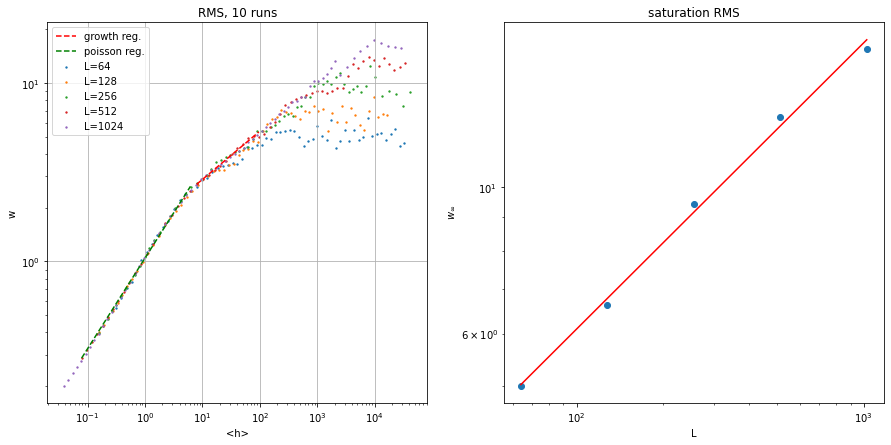

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rmsmax=np.array([])
L=np.array([64,128,256,512,1024])
testname=['scaling_1d_64/','scaling_1d_128/','scaling_1d_256/','scaling_1d_512/','scaling_1d_1024/']

plt.figure(figsize=(15,7))
plt.subplot(121)
for i in range(len(testname)):
    rms, n, errrms=np.loadtxt(testname[i]+'rmsvsN.dat')
    h, n, errh=np.loadtxt(testname[i]+'hvsN.dat')
    plt.scatter(h,rms, label='L='+str(L[i]), s=1.8)
    #plt.errorbar(h,rms, yerr=errrms, xerr=errh, label='L='+str(L[i]), fmt='.')
    rmsmax=np.append(rmsmax, np.mean(rms[-7:]))
    
    if i==3:
        a,b=20,32
        res= stats.linregress(np.log10(h[a:b]), np.log10(rms[a:b]))
        plt.plot(h[a:b], 10**res.intercept * h[a:b]**res.slope, 'r', label='growth reg.', ls='dashed')
        beta=res.slope
        print('          slope (beta):', round(res.slope,4))

        a,b=0,20
        res= stats.linregress(np.log10(h[a:b]), np.log10(rms[a:b]))
        plt.plot(h[a:b], 10**res.intercept * h[a:b]**res.slope, 'g', label='poisson reg.', ls='dashed')
        print('slope (poisson regime):', round(res.slope,4))

plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('<h>')
plt.ylabel('w')
plt.title('RMS, 10 runs')
plt.legend()
#plt.xlim(100,20000)
                     
plt.subplot(122)
plt.scatter(L,rmsmax)
res= stats.linregress(np.log10(L), np.log10(rmsmax))
plt.plot(L, 10**res.intercept * L**res.slope, 'r', label='fitted line')
print('          slope (alfa):', round(res.slope,4))
print('zeta:',round(res.slope/beta,4))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('L')
plt.ylabel(r' $w_{\infty}$ ')
plt.title('saturation RMS')
plt.show()
#print(rmsmax)

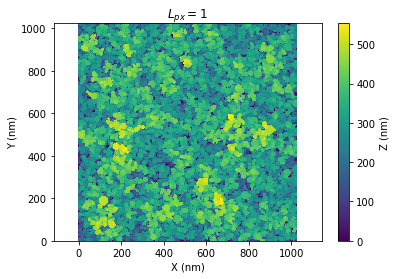

In [13]:
import mapsfunction as mf
mappa=np.loadtxt('maps/lognorm_1024_1_30000.dat')
mf.plotfalsecol(mappa,1)